# Handling missing values using all techniques (Numerical features)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum() # Number of missing values in every feature

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()#Percentage of missing data

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df[df['Age'].isnull()]

,Survived,Age,Fare
5,0,NaN,8.4583
17,1,NaN,13.0000
19,1,NaN,7.2250
26,0,NaN,7.2250
28,1,NaN,7.8792
...,...,...,...
859,0,NaN,7.2292
863,0,NaN,69.5500
868,0,NaN,9.5000
878,0,NaN,7.8958


## 1. Mean / Median/ Mode

In [6]:
median = df.Age.median()
median

28.0

In [7]:
def impute_na(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [8]:
impute_na(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


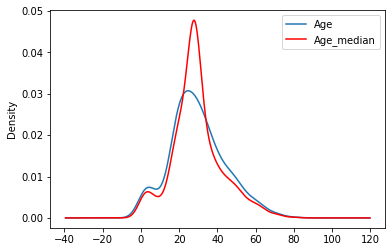

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 2. Random Sample Imputation

In [10]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
def impute_random_na(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    
    # Assigns actual age features to new random age
    df[variable+"_Random"] = df[variable]
    
    # this drops all NAN values and replaces them with a random values from the age column.
    df_random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state= 0)
    
    # index of Age column and df_random_sample is matched.
    # To merge df_random_sample and original null values from Age feature their indexes should match.
    df_random_sample.index = df[df[variable].isnull()].index
    
    # we are assigning all random values to Age and Age_Random which are NAN originally.
    df.loc[df[variable].isnull(), variable+"_Random"] = df_random_sample

In [12]:
median = df.Age.median()

impute_random_na(df,"Age",median)

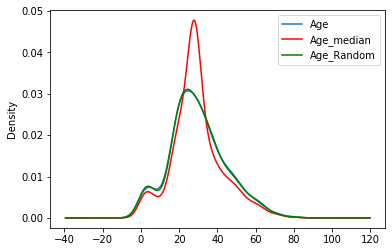

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_Random.plot(kind='kde', ax=ax, color='Green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## 3. capturing NAN values with a new feature

In [14]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
# It is nothing but the indicator or lable to check whether values are changed at given variable.
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [16]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [17]:
df.Age.median()

28.0

In [18]:
df["Age"] = df["Age"].fillna(df.Age.median())

In [19]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## 4. End of Distribution Imputation

In [20]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


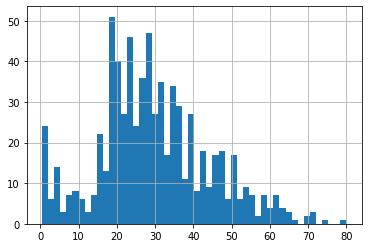

In [21]:
df.Age.hist(bins=50)

In [22]:
extreme = df.Age.mean()+3*df.Age.std() #This is how we find the extreme value.

In [23]:
def impute_extreme(df,variable,median,extreme):
    df[variable+"_median"]=df[variable].fillna(median)
    
    # Here we are finding the extreme value on the right side of the standard deviation and replcing NA values with 
    # that value.
    df[variable+"_extreme"] = df[variable].fillna(extreme)
    
    # Assigns actual age features to new random age
    df[variable+"_Random"] = df[variable]
    
    # this drops all NAN values and replaces them with a random values from the age column.
    df_random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state= 0)
    
    # index of Age column and df_random_sample is matched.
    # To merge df_random_sample and original null values from Age feature their indexes should match.
    df_random_sample.index = df[df[variable].isnull()].index
    
    # we are assigning all random values to Age and Age_Random which are NAN originally.
    df.loc[df[variable].isnull(), variable+"_Random"] = df_random_sample

In [24]:
impute_extreme(df,"Age",df.Age.median(),extreme)

In [25]:
df.head(10)

,Survived,Age,Fare,Age_median,Age_extreme,Age_Random
0,0,22.0,7.2500,22.0,22.00000,22.0
1,1,38.0,71.2833,38.0,38.00000,38.0
2,1,26.0,7.9250,26.0,26.00000,26.0
3,1,35.0,53.1000,35.0,35.00000,35.0
4,0,35.0,8.0500,35.0,35.00000,35.0
5,0,NaN,8.4583,28.0,73.27861,28.0
6,0,54.0,51.8625,54.0,54.00000,54.0
7,0,2.0,21.0750,2.0,2.00000,2.0
8,1,27.0,11.1333,27.0,27.00000,27.0
9,1,14.0,30.0708,14.0,14.00000,14.0


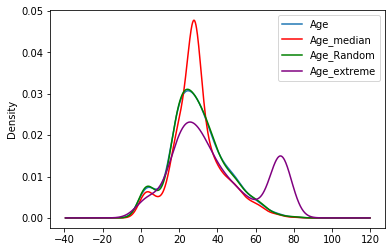

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_Random.plot(kind='kde', ax=ax, color='Green')
df.Age_extreme.plot(kind = 'kde',ax=ax,color = 'purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Arbitary value Imputation
Here we are replacing a NAN value simply with some arbitary value, because size of missing values is less.

In [27]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
def impute_arbit(df,variable):
    df[variable] = df[variable].fillna(100)

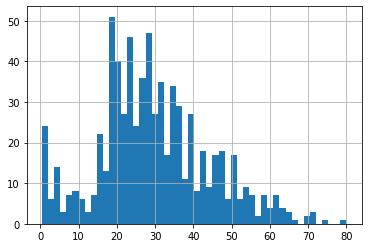

In [33]:
df['Age'].hist(bins=50)

In [34]:
impute_arbit(df,'Age')

In [35]:
df['Age'].head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5    100.0
6     54.0
7      2.0
8     27.0
9     14.0
Name: Age, dtype: float64